In [2]:
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
from google.cloud import bigquery
pd.set_option('display.max_rows', 100)    # Show all rows



load_dotenv()
query_path = os.environ.get('BASE_QUERY_PATH')
client = bigquery.Client(os.environ.get('BIGQUERY_PROJECT_NAME'))



In [3]:
print(os.environ.get('BIGQUERY_PROJECT_NAME'))


phys-439706


In [3]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/all_temps_ids.sql", 'r') as file:
    temps_reads = file.read()

temp_result = client.query(temps_reads).to_dataframe()
temp_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,itemid,temperature_label,unique_patients,total_measurements,avg_temperature,min_temperature,max_temperature
0,223761,Temperature Fahrenheit,17498,522143,98.40797,-99.9,9637.0
1,223762,Temperature Celsius,2181,74144,37.32990,-3.0,376.5


In [4]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/temps_overlap.sql", 'r') as file:
    overlap_detection = file.read()

overlap_detection_result = client.query(overlap_detection).to_dataframe()
overlap_detection_result





/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,unique_patients_a,unique_patients_b,overlapping_subjects
0,17498,2181,2058


In [13]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/fnhtr_temps.sql", 'r') as file:
    FNHRT_temps_read = file.read()

FNHRT_temps_result = client.query(FNHRT_temps_read).to_dataframe()
FNHRT_temps_result





/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,linkorderid,subject_id,hadm_id,icustay_id,transfusion_starttime,temp_recorded_time,temperature_fahrenheit,baseline_temp_f,fnthr_criteria
0,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-11 22:00:00,98.60,96.8,Temperature rise ≥1°C (1.8°F) above baseline
1,113,55728,126688,218685,2192-02-11 20:10:00,2192-02-12 00:00:00,98.70,96.8,Temperature rise ≥1°C (1.8°F) above baseline
2,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 16:00:00,99.50,97.5,Temperature rise ≥1°C (1.8°F) above baseline
3,3123,68629,128041,259191,2147-07-25 11:07:00,2147-07-25 12:00:00,100.20,97.5,Temperature rise ≥1°C (1.8°F) above baseline
4,4326,78182,104834,217022,2103-11-30 04:05:00,2103-11-30 08:00:00,100.40,99.6,Temperature ≥38°C (100.4°F)
...,...,...,...,...,...,...,...,...,...
11674,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-15 22:00:00,103.40,102.6,Temperature ≥38°C (100.4°F)
11675,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-15 23:00:00,103.70,102.6,Temperature ≥38°C (100.4°F)
11676,9999167,80342,160825,236675,2153-08-15 21:16:00,2153-08-16 01:00:00,104.70,102.6,Temperature ≥38°C (100.4°F)
11677,9999629,85055,169373,257999,2130-12-26 05:27:00,2130-12-26 06:00:00,93.74,91.5,Temperature rise ≥1°C (1.8°F) above baseline


In [14]:
#Check unique patients
unique_patients = FNHRT_temps_result.drop_duplicates(subset=['subject_id']).reset_index(drop=True)
len(unique_patients)


1463

In [15]:
#Check tranfusion events
unique_tranfusions = FNHRT_temps_result.drop_duplicates(subset=['linkorderid']).reset_index(drop=True)
len(unique_tranfusions)

4806

In [16]:
# get the types of items that can be administered to a patient

with open(f"{query_path}/FNHTR/total_patients.sql", 'r') as file:
    total_patients_read = file.read()

total_patients_result = client.query(total_patients_read).to_dataframe()
total_patients_result




/home/tyx1999120755/.pyenv/versions/3.12.7/envs/transfusion/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,total_unique_patients
0,46520


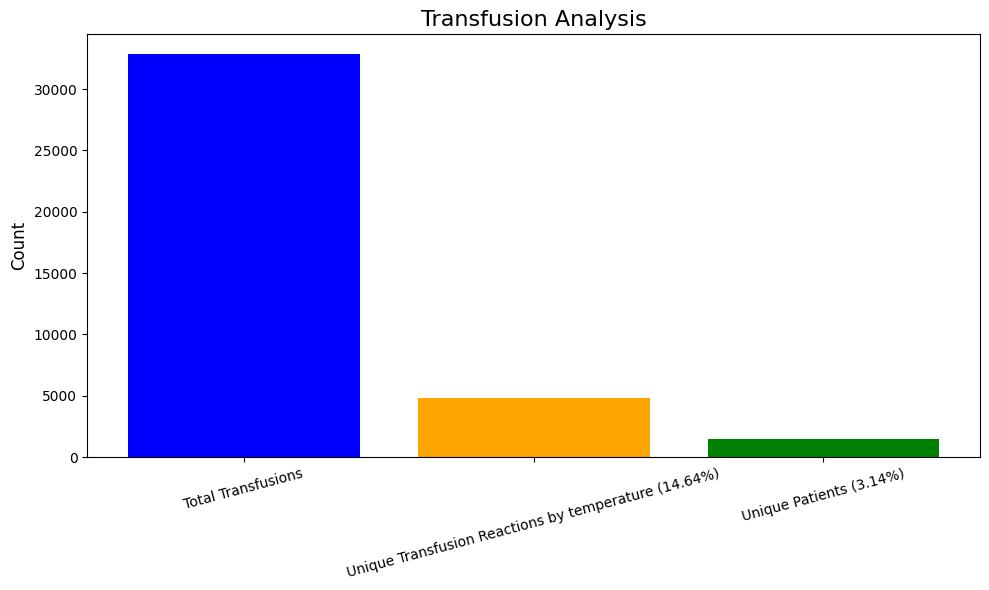

In [17]:
import matplotlib.pyplot as plt

# Updated Data
categories = ["Total Transfusions", "Unique Transfusion Reactions", "Unique Patients"]
values = [32818, 4806, 1463]

# Calculate percentages
reaction_percentage = (values[1] / values[0]) * 100  # Percentage of unique transfusion reactions
patient_percentage = (values[2] / 46520) * 100  # Percentage of unique patients relative to reactions

# Format values with percentages
labels = [
    "Total Transfusions",
    f"Unique Transfusion Reactions by temperature ({reaction_percentage:.2f}%)",
    f"Unique Patients ({patient_percentage:.2f}%)"
]

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['blue', 'orange', 'green'])
plt.title("Transfusion Analysis", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xticks(categories, labels, rotation=15, fontsize=10)
plt.tight_layout()
plt.show()
